In [1]:
import os
os.getcwd()
os.chdir('D:\\Data Science\\Data Pre-Processing')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('Employee_Data.xls')

In [4]:
data.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      9
Age             6
Experience     13
Salary          0
dtype: int64

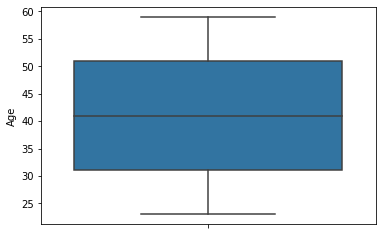

In [8]:
import seaborn as sns
sns.boxplot(y='Age', data=data)

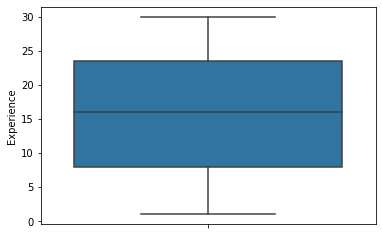

In [7]:
sns.boxplot(y='Experience', data=data)

In [10]:
x=data.iloc[:,3:6].values

In [11]:
x

array([['Asset Management', 38.0, 23.0],
       ['Customer Service', 26.0, 10.0],
       ['Human Resources', nan, 14.0],
       ['Public Relations', nan, 12.0],
       ['Customer Service', nan, 13.0],
       ['Advertising', nan, 9.0],
       ['Research and Development', nan, 24.0],
       ['Asset Management', nan, 2.0],
       ['Legal Department', 40.0, 30.0],
       ['Advertising', 24.0, 23.0],
       ['Legal Department', 35.0, 3.0],
       [nan, 31.0, nan],
       [nan, 58.0, nan],
       [nan, 51.0, nan],
       [nan, 27.0, nan],
       [nan, 54.0, nan],
       [nan, 55.0, nan],
       ['Media Relations', 58.0, nan],
       ['Research and Development', 59.0, nan],
       ['Media Relations', 45.0, 4.0],
       ['Sales and Marketing', 50.0, 2.0],
       ['Advertising', 55.0, 19.0],
       ['Tech Support', 40.0, 20.0],
       ['Advertising', 51.0, 21.0],
       ['Media Relations', 24.0, 12.0],
       ['Asset Management', 57.0, 25.0],
       ['Legal Department', 24.0, 9.0],
       ['Pub

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

In [18]:
x[:,0:1] = imp.fit_transform(x[:,0:1])

In [23]:
data.groupby('Department').size()

Department
Accounting                  8
Advertising                 9
Asset Management            7
Customer Relations          6
Customer Service            5
Finances                    8
Human Resources             5
Legal Department            7
Media Relations             8
Payroll                     3
Public Relations            6
Quality Assurance           6
Research and Development    4
Sales and Marketing         2
Tech Support                7
dtype: int64

In [24]:
data_2 = data
round(data_2.iloc[:,5:6],3)

,Experience
0,23.0
1,10.0
2,14.0
3,12.0
4,13.0
...,...
95,16.0
96,3.0
97,5.0
98,27.0


In [26]:
type(data_2)

pandas.core.frame.DataFrame

In [27]:
data_2['Department'] = data_2['Department'].fillna('Sales and Marketing')

In [28]:
data_2['Age'] = data_2['Age'].fillna(data_2['Age'].mean())

In [29]:
data_2['Experience'] = data_2['Experience'].fillna(data_2['Experience'].mean())

In [30]:
data_2

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Camden,Savage,Asset Management,38.00000,23.0,46975
1,2,Justina,Mcconnell,Customer Service,26.00000,10.0,30711
2,3,Stewart,Moon,Human Resources,40.93617,14.0,25049
3,4,Tobias,Fletcher,Public Relations,40.93617,12.0,33309
4,5,Raja,Sims,Customer Service,40.93617,13.0,25274
...,...,...,...,...,...,...,...
95,96,Nerea,Haney,Tech Support,52.00000,16.0,17756
96,97,Nadine,Franks,Customer Relations,52.00000,3.0,31886
97,98,Aquila,Jacobson,Quality Assurance,30.00000,5.0,39812
98,99,Wang,Doyle,Research and Development,32.00000,27.0,30742


In [31]:
#Outlier Treatment

In [32]:
data_3 = pd.read_excel('OutlierData.xlsx')

In [33]:
data_3

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10
8,Marketing,31,2
9,IT,55,35


In [34]:
Q1 = data_3.quantile(0.25)
Q3 = data_3.quantile(0.75)

In [35]:
Q1

Age           32.25
Experience    10.25
Name: 0.25, dtype: float64

In [36]:
Q3

Age           34.75
Experience    12.00
Name: 0.75, dtype: float64

In [37]:
IQR = Q3-Q1

In [38]:
IQR

Age           2.50
Experience    1.75
dtype: float64

In [40]:
data_3['Department'] = data_3['Department'].astype('category')
data_3['Department'] = data_3['Department'].cat.codes

In [41]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Department    10 non-null int8
Age           10 non-null int64
Experience    10 non-null int64
dtypes: int64(2), int8(1)
memory usage: 298.0 bytes


In [42]:
data_3[~((data_3 < (Q1 - 1.5*IQR))| (data_3> (Q3 + 1.5*IQR))).any(axis=1)]

,Department,Age,Experience
1,0,33,12
2,1,35,12
3,1,36,12
4,0,34,11
5,1,33,13
6,2,34,12
7,0,32,10


In [43]:
data_3[((data_3 < (Q1 - 1.5*IQR))| (data_3> (Q3 + 1.5*IQR))).any(axis=1)]

,Department,Age,Experience
0,0,21,1
8,2,31,2
9,1,55,35
